In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib notebook

In [3]:
def lprint():
    print('='*70)

In [4]:
lprint()

In [5]:
# 한글 font 설정
import platform
import matplotlib.font_manager as fm

if platform.system() == 'Darwin':
    plt.rc('font',family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용시 마이너스 폰트 깨짐 해결


In [6]:
# 글씨 선명하게 출력하는 설정

from IPython.display import set_matplotlib_formats

set_matplotlib_formats("retina")

In [7]:
df_all = pd.read_csv("/Users/cheon-yujeong/빅데이터분석_수업/df_all.csv")
df_all.head(2)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
1,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711


In [8]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714111 entries, 0 to 714110
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     714111 non-null  int64  
 1   상호명        714110 non-null  object 
 2   지점명        115739 non-null  object 
 3   상권업종대분류코드  714111 non-null  object 
 4   상권업종대분류명   714111 non-null  object 
 5   상권업종중분류코드  714111 non-null  object 
 6   상권업종중분류명   714111 non-null  object 
 7   상권업종소분류코드  714111 non-null  object 
 8   상권업종소분류명   714111 non-null  object 
 9   표준산업분류코드   670690 non-null  object 
 10  표준산업분류명    670690 non-null  object 
 11  시도코드       714111 non-null  int64  
 12  시도명        714111 non-null  object 
 13  시군구코드      714111 non-null  int64  
 14  시군구명       714111 non-null  object 
 15  행정동코드      714111 non-null  int64  
 16  행정동명       713900 non-null  object 
 17  법정동코드      714111 non-null  int64  
 18  법정동명       714111 non-null  object 
 19  지번코드       714111 non-n

In [9]:
columns = ['상호명','상권업종대분류명','상권업종중분류명','상권업종소분류명',
          '시도명', '시군구명','행정동명','법정동명','도로명주소','경도','위도']

df_col = df_all[columns].copy()
df_col.shape

(714111, 11)

In [10]:
df_loc = df_all.loc[:,['상호명','상권업종대분류명','상권업종중분류명','상권업종소분류명',
          '시도명', '시군구명','행정동명','법정동명','도로명주소','경도','위도']]
df_loc.shape

(714111, 11)

In [11]:
df_loc['상호명'].unique()

array(['커피빈코리아선릉로93길점', '프로포즈', '와라와라호프', ..., '본현대미아점', '앤클라인뉴욕핸드백',
       '피움테라피'], dtype=object)

In [12]:
df_loc['상권업종중분류명'].value_counts()

한식          84636
이/미용/건강     61301
종합소매점       48496
커피점/카페      42512
의복의류        39249
            ...  
부동산관련서비스        5
부동산임대           3
기타교육기관          3
전시/관람           2
특수교육기관          1
Name: 상권업종중분류명, Length: 93, dtype: int64

In [13]:
df_coffee = df_loc[(df_loc['상권업종중분류명']=='커피점/카페')]
df_coffee.index = range(len(df_coffee))
print("서울시 내 커피 전문점 점포 수: ",len(df_coffee))
df_coffee.head()

서울시 내 커피 전문점 점포 수:  42512


,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
0,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
1,고려대학교교육관쎄리오점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,성북구,안암동,안암동5가,서울특별시 성북구 안암로 145,127.031702,37.588485
2,스완카페트,음식,커피점/카페,커피전문점/카페/다방,서울특별시,영등포구,대림3동,대림동,서울특별시 영등포구 도신로10가길 11-1,126.897710,37.503693
3,왕실,음식,커피점/카페,커피전문점/카페/다방,서울특별시,중구,명동,명동2가,서울특별시 중구 남대문로 52-13,126.982419,37.562274
4,커피빈,음식,커피점/카페,커피전문점/카페/다방,서울특별시,서초구,서초1동,서초동,서울특별시 서초구 서초중앙로 118,127.014217,37.492388


In [14]:
df_cafe = df_coffee[df_coffee['상호명'].str.contains('스타벅스|starbucks|STARBUCKS|이디아|이디야|ediya|EDIYA', na = False)].copy()
df_cafe.shape

(2066, 11)

In [15]:
df_cafe.head(10)

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
22,스타벅스,음식,커피점/카페,커피전문점/카페/다방,서울특별시,용산구,이태원1동,이태원동,서울특별시 용산구 이태원로 188,126.994781,37.534303
33,이디야커피,음식,커피점/카페,커피전문점/카페/다방,서울특별시,영등포구,신길1동,신길동,서울특별시 영등포구 영등포로 353,126.918062,37.515118
55,스타벅스종로3가점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,종로구,종로1.2.3.4가동,종로3가,서울특별시 종로구 종로 113-1,126.990207,37.570585
93,스타벅스,음식,커피점/카페,커피전문점/카페/다방,서울특별시,서초구,잠원동,잠원동,서울특별시 서초구 강남대로 581,127.019763,37.513663
100,이디야커피,음식,커피점/카페,커피전문점/카페/다방,서울특별시,구로구,구로3동,구로동,서울특별시 구로구 디지털로32길 43,126.897870,37.484385
123,이디야커피,음식,커피점/카페,커피전문점/카페/다방,서울특별시,노원구,중계1동,중계동,서울특별시 노원구 노원로22길 34,127.072754,37.646364
259,이디야커피,음식,커피점/카페,커피전문점/카페/다방,서울특별시,성동구,금호2.3가동,금호동3가,서울특별시 성동구 장터길 17-1,127.017791,37.548427
278,이디아,음식,커피점/카페,커피전문점/카페/다방,서울특별시,마포구,상암동,상암동,서울특별시 마포구 월드컵북로 375,126.890828,37.577397
288,스타벅스커피여의도IFC1F,음식,커피점/카페,커피전문점/카페/다방,서울특별시,영등포구,여의동,여의도동,서울특별시 영등포구 국제금융로 10,126.924863,37.525172
290,스타벅스,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,삼성1동,삼성동,서울특별시 강남구 테헤란로103길 9,127.063878,37.510038


In [16]:
df_cafe.index = range(len(df_cafe))

In [17]:
df_cafe.loc[df_cafe['상호명'].str.contains('스타벅스|starbucks|STARBUCKS'),'브랜드명'] = '스타벅스'
df_cafe.loc[~df_cafe['상호명'].str.contains('스타벅스|starbucks|STARBUCKS'),'브랜드명'] = '이디야'

In [18]:
df_cafe.head(10)

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,브랜드명
0,스타벅스,음식,커피점/카페,커피전문점/카페/다방,서울특별시,용산구,이태원1동,이태원동,서울특별시 용산구 이태원로 188,126.994781,37.534303,스타벅스
1,이디야커피,음식,커피점/카페,커피전문점/카페/다방,서울특별시,영등포구,신길1동,신길동,서울특별시 영등포구 영등포로 353,126.918062,37.515118,이디야
2,스타벅스종로3가점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,종로구,종로1.2.3.4가동,종로3가,서울특별시 종로구 종로 113-1,126.990207,37.570585,스타벅스
3,스타벅스,음식,커피점/카페,커피전문점/카페/다방,서울특별시,서초구,잠원동,잠원동,서울특별시 서초구 강남대로 581,127.019763,37.513663,스타벅스
4,이디야커피,음식,커피점/카페,커피전문점/카페/다방,서울특별시,구로구,구로3동,구로동,서울특별시 구로구 디지털로32길 43,126.897870,37.484385,이디야
5,이디야커피,음식,커피점/카페,커피전문점/카페/다방,서울특별시,노원구,중계1동,중계동,서울특별시 노원구 노원로22길 34,127.072754,37.646364,이디야
6,이디야커피,음식,커피점/카페,커피전문점/카페/다방,서울특별시,성동구,금호2.3가동,금호동3가,서울특별시 성동구 장터길 17-1,127.017791,37.548427,이디야
7,이디아,음식,커피점/카페,커피전문점/카페/다방,서울특별시,마포구,상암동,상암동,서울특별시 마포구 월드컵북로 375,126.890828,37.577397,이디야
8,스타벅스커피여의도IFC1F,음식,커피점/카페,커피전문점/카페/다방,서울특별시,영등포구,여의동,여의도동,서울특별시 영등포구 국제금융로 10,126.924863,37.525172,스타벅스
9,스타벅스,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,삼성1동,삼성동,서울특별시 강남구 테헤란로103길 9,127.063878,37.510038,스타벅스


In [19]:
df_cafe.to_csv('df_cafe.csv',index=False)

### 시각화

In [20]:
import seaborn as sns

df_cafe = pd.read_csv("df_cafe.csv")
sns.catplot(y='시군구명',hue='브랜드명',col='브랜드명',data=df_cafe, kind="count", height=5,aspect=.7)

<IPython.core.display.Javascript object>

In [21]:
df_cafe[['위도','경도']] #.plot.scatter(x='경도',y='위도')

,위도,경도
0,37.534303,126.994781
1,37.515118,126.918062
2,37.570585,126.990207
3,37.513663,127.019763
4,37.484385,126.897870
...,...,...
2061,37.501655,127.011539
2062,37.494197,127.077635
2063,37.499740,127.034941
2064,37.501886,127.037277


<IPython.core.display.Javascript object>


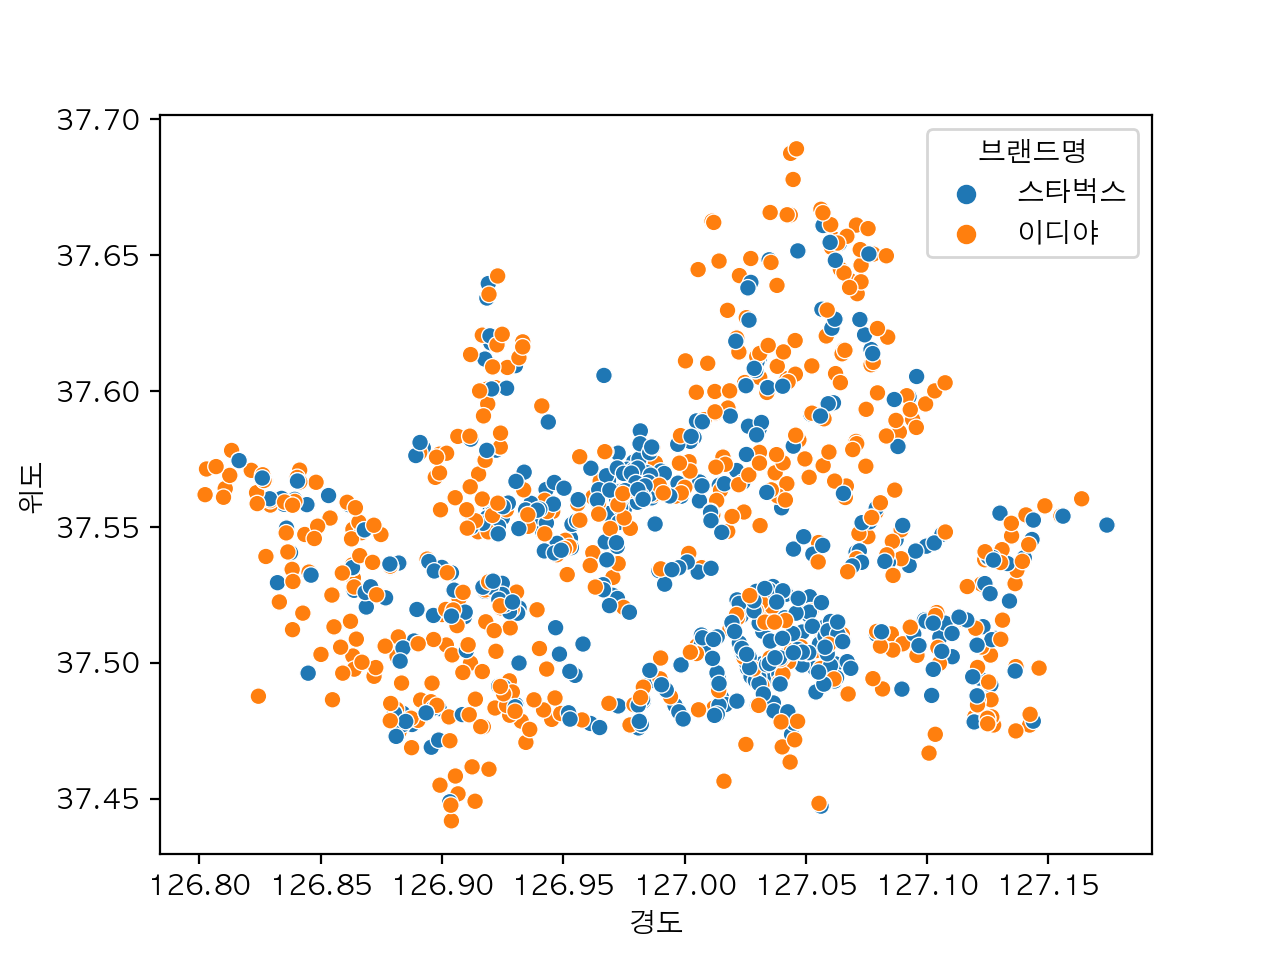

<AxesSubplot:xlabel='경도', ylabel='위도'>

In [22]:
sns.scatterplot(data=df_cafe, x='경도', y='위도', hue='브랜드명', markers='markers')

In [23]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [24]:
import folium

# 지도 중심 지정

lat = df_cafe['위도'].mean()
long = df_cafe['경도'].mean()
lat, long

(37.541837000691714, 126.98969690578721)

In [27]:
m = folium.Map([lat,long], zoom_start =15, tiles ='Stamen Toner')
m

In [29]:
for i in df_cafe.index:
    sub_lat = df_cafe.loc[i,'위도']
    sub_long = df_cafe.loc[i,'경도']
    
    title = "{df_cafe.loc[i,상호명]} - {df_cafe.loc[i,'도로명주소']}"
    
    color = 'orange'
    if df_cafe.loc[i,'브랜드명'] == '이디야':
        color = 'green'
        
    folium.CircleMarker([sub_lat, sub_long], radius=6, color=color, tootip= title).add_to(m)
m

In [30]:
df_cafe_count = df_cafe.groupby(['시군구명','브랜드명'])["상호명"].count()
df_cafe_count.head(10)

시군구명  브랜드명
강남구   스타벅스    174
      이디야      92
강동구   스타벅스     29
      이디야      31
강북구   스타벅스     10
      이디야      25
강서구   스타벅스     38
      이디야      92
관악구   스타벅스     23
      이디야      44
Name: 상호명, dtype: int64

In [31]:
df_cafe_count.to_frame().head(10)

상호명
시군구명 브랜드명     
강남구  스타벅스  174
     이디야    92
강동구  스타벅스   29
     이디야    31
강북구  스타벅스   10
     이디야    25
강서구  스타벅스   38
     이디야    92
관악구  스타벅스   23
     이디야    44

In [32]:
df_cafe_count.reset_index().head(10)

,시군구명,브랜드명,상호명
0,강남구,스타벅스,174
1,강남구,이디야,92
2,강동구,스타벅스,29
3,강동구,이디야,31
4,강북구,스타벅스,10
5,강북구,이디야,25
6,강서구,스타벅스,38
7,강서구,이디야,92
8,관악구,스타벅스,23
9,관악구,이디야,44


In [33]:
df_count = df_cafe_count.reset_index()

In [34]:
df_count.columns = ['구명','브랜드명','매장수']
df_count.head()

,구명,브랜드명,매장수
0,강남구,스타벅스,174
1,강남구,이디야,92
2,강동구,스타벅스,29
3,강동구,이디야,31
4,강북구,스타벅스,10


In [38]:
geo_path ='seoul_municipalities_geo_simple.json'

import json
geo_json = json.load(open(geo_path, encoding = 'utf-8'))
geo_json['features'][0]['properties']['name']

'강동구'

In [39]:
df_count_star = df_count[df_count['브랜드명'] == '스타벅스'].copy()
df_count_star.head()

,구명,브랜드명,매장수
0,강남구,스타벅스,174
2,강동구,스타벅스,29
4,강북구,스타벅스,10
6,강서구,스타벅스,38
8,관악구,스타벅스,23


In [40]:
df_count_ediya = df_count[df_count['브랜드명'] == '이디야'].copy()
df_count_ediya.head()

,구명,브랜드명,매장수
1,강남구,이디야,92
3,강동구,이디야,31
5,강북구,이디야,25
7,강서구,이디야,92
9,관악구,이디야,44


In [41]:
df_vs = df_count.pivot(index='구명', columns='브랜드명', values='매장수')
df_vs['매장수비교'] = df_vs['스타벅스'] - df_vs['이디야'] >0
df_vs.head()

브랜드명,스타벅스,이디야,매장수비교
구명,,,
강남구,174,92,True
강동구,29,31,False
강북구,10,25,False
강서구,38,92,False
관악구,23,44,False


In [42]:
df_vs['매장수비교'] = df_vs['매장수비교'].astype(float)
df_vs.head()

브랜드명,스타벅스,이디야,매장수비교
구명,,,
강남구,174,92,1.0
강동구,29,31,0.0
강북구,10,25,0.0
강서구,38,92,0.0
관악구,23,44,0.0


In [43]:
df_vs = df_vs.reset_index()
df_vs.head()

브랜드명,구명,스타벅스,이디야,매장수비교
0,강남구,174,92,1.0
1,강동구,29,31,0.0
2,강북구,10,25,0.0
3,강서구,38,92,0.0
4,관악구,23,44,0.0


In [44]:
df_gu_mean = df_cafe.pivot_table(index ='시군구명', values=['경도','위도'], aggfunc = 'mean')
df_gu_mean = df_gu_mean.reset_index()
df_gu_mean.head()

,시군구명,경도,위도
0,강남구,127.046344,37.506132
1,강동구,127.136479,37.542089
2,강북구,127.022906,37.630657
3,강서구,126.838264,37.556208
4,관악구,126.933116,37.481986


In [45]:
df_vs = df_vs.merge(df_gu_mean, how='inner', left_on='구명', right_on='시군구명')
df_vs.head()

,구명,스타벅스,이디야,매장수비교,시군구명,경도,위도
0,강남구,174,92,1.0,강남구,127.046344,37.506132
1,강동구,29,31,0.0,강동구,127.136479,37.542089
2,강북구,10,25,0.0,강북구,127.022906,37.630657
3,강서구,38,92,0.0,강서구,126.838264,37.556208
4,관악구,23,44,0.0,관악구,126.933116,37.481986


In [46]:
for i in df_vs.index:
    sub_long = df_vs.loc[i,'경도']
    sub_lat = df_vs.loc[i,'위도']
    
    print(df_vs.loc[i,'구명'], sub_lat, sub_long)

강남구 37.50613240132689 127.04634443794295
강동구 37.542088985439236 127.1364788894485
강북구 37.630656777715984 127.02290638327966
강서구 37.55620767294527 126.83826436524517
관악구 37.48198649806568 126.93311579937594
광진구 37.54421861865406 127.08310103827691
구로구 37.49521181410971 126.87772192041173
금천구 37.46970943203252 126.89192664819058
노원구 37.64266998271504 127.06706082003812
도봉구 37.664628303135515 127.04066761816557
동대문구 37.58018868968397 127.05417221931728
동작구 37.495644621705864 126.95016095430444
마포구 37.5552323498657 126.92403584704986
서대문구 37.566601499414794 126.93795396499073
서초구 37.49198426691081 127.01386820239232
성동구 37.55411292567504 127.03765900372059
성북구 37.600902507091845 127.02761546078082
송파구 37.500731215403626 127.1143813421016
양천구 37.528972737696236 126.86318266100143
영등포구 37.5203333431786 126.91358101148238
용산구 37.53568600823668 126.97847337255827
은평구 37.61279082638455 126.92077613102627
종로구 37.57610159029344 126.98583202510159
중구 37.56271354199207 126.9869206083449
중랑구 37.5969

In [50]:
m = folium.Map([lat, long], zoom_start=11, tiles='stamen toner')

folium.Choropleth(
    geo_data=geo_json, name='choropleth', data=df_vs, columns=['구명', '매장수비교'], key_on = 'feature.properties.name',
    fill_color='GnBu', fill_opacity=0.8, line_opacity=0.4, legend_name='매장수 비교').add_to(m)

for i in df_vs.index:
    sub_long = df_vs.loc[i,"경도"]
    sub_lat = df_vs.loc[i,'위도']
    
    cafes =['스타벅스','이디야']
    
    for cafe in cafes:
        cafe_count = df_vs.loc[i,cafe]
        
        gu = df_vs.loc[i,'구명']
        tooltip = f"{gu}{cafe}: {cafe_count}"
        
        radius = np.sqrt(cafe_count) *3
        
        if cafe == "이디야":
            color = 'blue'
            sub_long = sub_long + 0.01
        else :
            color = "orange"
        
        folium.CircleMarker([sub_lat,sub_long],
                            radius = radius,
                            color = color,
                            fill = True,
                            tooltip=tooltip,
                            ).add_to(m)
m

In [51]:
m.save("Coffe-STARstore-vs-Ediya.html")